## Main Goal
A company recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”!  
One of our clients, TEST.com, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.

The A/B test has run for 1 month and TEST.com now expects you to analyze and present the results of this A/B test.

> **A/B testing** helps in finding a better approach to finding customers, marketing products, getting a higher reach, or anything that helps a business convert most of its target customers into actual customers.

#### Hypotheses:

**Null Hypothesis (H₀)**: There is no significant difference in conversions between average bidding and maximum bidding.  
**Alternative Hypothesis (H₁)**: Average bidding leads to significantly more conversions than maximum bidding.

> **Objective**: To determine whether the new average bidding strategy improves conversion metrics (e.g., purchases, add-to-cart rates) compared to the existing maximum bidding.

### Data Understanding
The dataset has the following features:

1. **Campaign Name**: The name of the campaign
2. **Date**: Date of the record
3. **Spend**: Amount spent on the campaign in dollars
4. **of Impressions**: Number of impressions the ad crossed through the campaign
5. **Reach**: The number of unique impressions received in the ad
6. **of Website Clicks**: Number of website clicks received through the ads
7. **of Searches**: Number of users who performed searches on the website 
8. **of View Content**: Number of users who viewed content and products on the website
9. **of Add to Cart**: Number of users who added products to the cart
10. **of Purchase**: Number of purchases

The dataset can be found at: [https://www.kaggle.com/datasets/ilkeryildiz/example-dataset-for-ab-test]

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
control_data = pd.read_csv("datasets/ab/control_group.csv", sep=";")
test_data = pd.read_csv("datasets/ab/test_group.csv", sep=";")

In [4]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


### Data Preprocessing
Some feature's names are incorrect, let's fix them first!

In [6]:
new_columnNames = ['Campaign Name', 'Date', 'Amount Spent', 'Number of Impressions', 'Reach', 'Number of Website Clicks', 'Number of Searches', 
                        'Number of View Content', 'Number of Add to Cart', 'Number of Purchase']
control_data.columns = new_columnNames
test_data.columns = new_columnNames

In [7]:
control_data.head(2)

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [8]:
# Checking Null Values
test_data.isnull().sum()

Campaign Name               0
Date                        0
Amount Spent                0
Number of Impressions       0
Reach                       0
Number of Website Clicks    0
Number of Searches          0
Number of View Content      0
Number of Add to Cart       0
Number of Purchase          0
dtype: int64

In [9]:
control_data.isnull().sum()

Campaign Name               0
Date                        0
Amount Spent                0
Number of Impressions       1
Reach                       1
Number of Website Clicks    1
Number of Searches          1
Number of View Content      1
Number of Add to Cart       1
Number of Purchase          1
dtype: int64

In [10]:
# Dealing With Outliers by filling them with the average value of each respective column

control_data['Number of Impressions'] = control_data['Number of Impressions'].fillna(value=control_data['Number of Impressions'].mean())
control_data['Reach'] = control_data['Reach'].fillna(value=control_data['Reach'].mean())
control_data['Number of Website Clicks'] = control_data['Number of Website Clicks'].fillna(value=control_data['Number of Website Clicks'].mean())
control_data['Number of Searches'] = control_data['Number of Searches'].fillna(value=control_data['Number of Searches'].mean())
control_data['Number of View Content'] = control_data['Number of View Content'].fillna(value=control_data['Number of View Content'].mean())
control_data['Number of Add to Cart'] = control_data['Number of Add to Cart'].fillna(value=control_data['Number of Add to Cart'].mean())
control_data['Number of Purchase'] = control_data['Number of Purchase'].fillna(value=control_data['Number of Purchase'].mean())

In [11]:
control_data.isnull().sum()

Campaign Name               0
Date                        0
Amount Spent                0
Number of Impressions       0
Reach                       0
Number of Website Clicks    0
Number of Searches          0
Number of View Content      0
Number of Add to Cart       0
Number of Purchase          0
dtype: int64

In [19]:
# Convert 'Date' columns to datetime format
control_data['Date'] = pd.to_datetime(control_data['Date'], format='%d.%m.%Y')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d.%m.%Y')

#### Merging the datasets

In [20]:
# Convert all numerical columns to float
for col in control_data.select_dtypes(include=['int', 'float']).columns:
    control_data[col] = control_data[col].astype(float)
    test_data[col] = test_data[col].astype(float)

In [21]:
dataset = control_data.merge(test_data, how='outer').sort_values(['Date'])
dataset = dataset.reset_index(drop=True)

In [22]:
dataset.head(2)

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,2019-08-01,2280.0,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-08-01,3008.0,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0


### Exploratory Data Analysis
#### What is the overall distribution of key conversion metrics (e.g., Number of Purchase, Number of Add to Cart) for each bidding type?

In [24]:
# Calculate summary statistics
campaign_grouped = dataset.groupby('Campaign Name')[['Number of Add to Cart', 'Number of Purchase']].agg(['mean', 'median', 'std', 'min', 'max', 'quantile'])

In [30]:
campaign_grouped.head()

Number of Add to Cart                                     \
                                  mean  median         std    min     max   
Campaign Name                                                               
Control Campaign           1300.000000  1319.5  400.371207  442.0  1913.0   
Test Campaign               881.533333   974.0  347.584248  278.0  1391.0   

                          Number of Purchase                                   \
                 quantile               mean median         std    min    max   
Campaign Name                                                                   
Control Campaign   1319.5         522.793103  506.0  181.810508  222.0  800.0   
Test Campaign       974.0         521.233333  500.0  211.047745  238.0  890.0   

                           
                 quantile  
Campaign Name              
Control Campaign    506.0  
Test Campaign       500.0

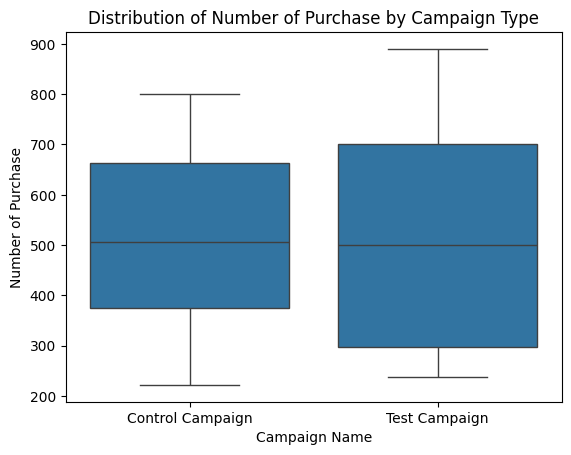

In [25]:
# Box plot for distribution
sns.boxplot(x='Campaign Name', y='Number of Purchase', data=dataset)
plt.title('Distribution of Number of Purchase by Campaign Type')
plt.show()

> Both campaigns have similar mean values for the number of purchases, which suggests that on average, the campaigns are performing similarly in terms of driving purchases.  
**Test Campaign**: Exhibits a wider spread, with purchases ranging from around 300 to 700, indicating greater variability in performance. This could imply that some of the test campaigns are performing significantly better or worse than others.  
**Control Campaign**: Shows a narrower range (380 to 670), indicating more consistent performance with fewer outliers.  

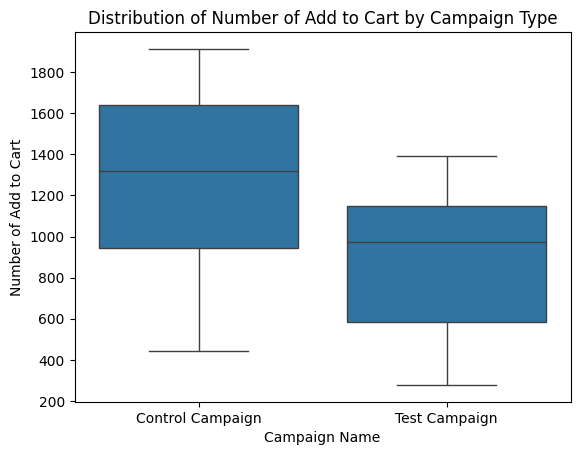

In [26]:
sns.boxplot(x='Campaign Name', y='Number of Add to Cart', data=dataset)
plt.title('Distribution of Number of Add to Cart by Campaign Type')
plt.show()

> The control campaign has a higher mean for the number of add to carts compared to the test campaign. This suggests that, on average, the control campaign is more effective in getting users to add items to their carts.  
**Control Campaign**: Starts at a higher baseline (960) and has a more extensive range (up to 1630), indicating that the control campaign consistently drives higher add-to-cart actions across its campaigns.  
**Test Campaign**: Starts at a lower baseline (600) and has a narrower range (up to 1150), suggesting lower and less variable add-to-cart actions compared to the control campaign.

In [31]:
# Sum of purchases for each campaign type
purchase_counts = dataset.groupby('Campaign Name')['Number of Purchase'].sum()

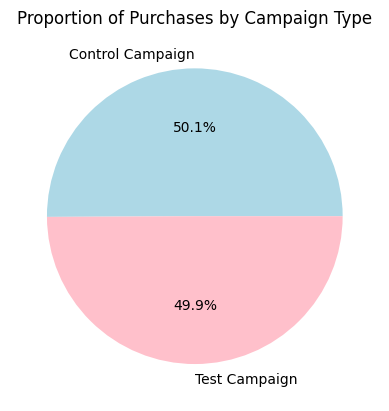

In [33]:
# Plotting the pie chart
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Proportion of Purchases by Campaign Type')
plt.show()

> Out of all purchases recorded in the dataset, 50.1% were made through the Control Campaign and 49.9% through the Test Campaign.

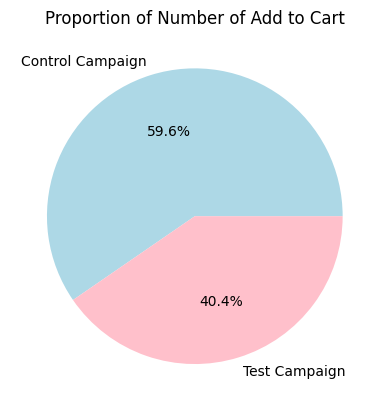

In [34]:
addCart_counts = dataset.groupby('Campaign Name')['Number of Add to Cart'].sum()
# Plotting the pie chart
plt.pie(addCart_counts, labels=addCart_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Proportion of Number of Add to Cart')
plt.show()

> "Out of all users who added products to their cart, 59.6% were from the Control Campaign, while the remaining 40.4% were from the Test Campaign!